# New Orleans Airbnb Analysis

#### Exploritory Data Analysis and Using Machine Learning to Make a Predictive Model

Author: Rachel Fein

---

## Overview

This analysis was completed for Sarah Alter, a private investor, for the purpose of helping Ms. Alter gain a better understanding of New Orlean’s short term rental market as she prepares to invest. Ms. Alter’s goal is to use this analysis and predictive model as a metric to help her decide what property would be the best for her investment. This analysis aims to use EDA as well as to develop a  model to predict the nightly rate for short term rental properties to get her goal met. 

The dataset in this analysis comes from Kaggle, however it is noted by the Kaggle User who uploaded the dataset that they pulled the data originally from Inside Airbnb. The dataset was compiled on November 7, 2021 and all time oriented variables in this dataset are based around that date. The dataset contains 6,028 Airbnb listings in the city of New Orleans. The data went through light cleaning to deal with NaN values and remove columns that were irrelevant to the business problem. Exploratory data analysis was performed then the dataset was split into test and training sets for data preprocessing in preparation for modeling. 

During data preprocessing, outliers were removed, categorical data was encoded, skewed columns were transformed, and the data was standardized. Outliers were removed using the IQR method. Categorical data was encoded using OneHotEncoder and OrdinalEncoder both from feature_engine. Skewed columns were transformed using the Box-Cox method in PowerTransformer from Sklearn. The data was standardized using StandardScaler from sklearn. 

Data modeling was performed in the Model notebook. A baseline model was created and future models were compared to the baseline model to determine if the model’s performance was being improved. The main performance metric used to evaluate the success of the model was the Root Mean Square Error. Multiple different types of model’s were run and GridsearchCV was used to attempt to improve the models. Using GridsearchCV did not prove helpful so feature selection was implemented on the two best performing models (Linear Regression and XGBoost). Feature selection methods implemented were ANOVA, Lasso, and using only features of top importance determined by the coefficients. Feature selection did not prove helpful, but did show that many of the top features were categorical features which gave insight on why the model’s performance was not improving. Lastly, knowing that it appeared the model was overfitting and relying heavily on the categorical data, all neighborhood columns which made up the majority of the columns were eliminated.  At this point it was time to put effort into understanding why the model was not performing and brainstorm what can be learned from the analysis as is and what future steps could be taken to improve this analysis. 

The final model was a Linear Regression model. In summary this analysis showed:
- The final model had an RMSE of $ on the test set.
- The model is suggesting it is overfitting
- As of now EDA analysis proves more informative than the predictive model. 

---

## Business Problem
This analysis was completed for Sarah Alter, a private investor, who is interested in expanding her vacation rental portfolio to New Orleans, LA. Alter is new to the New Orleans vacation rental market and wants to use this analysis as a guide as she starts her search for a new property. To help Alter reach her goal, exploratory data analysis is used to get an overview of the market. This analysis also attempts to provide a price predicting model. A predictive model would be informative when applied to current properties on the market to help Alter get a grasp on what nightly rates she can expect based on specific features of the property. 



## Data Understanding
The dataset in this analysis comes from Kaggle but was originally sourced from Inside Airbnb. The dataset was compiled on November 7, 2021 and all time oriented variables in this dataset are based on that date. The dataset contained 6,028 Airbnb listings all within the city of New Orleans. During data cleaning and preprocessing some listings were removed for various reasons, a combined 5,298 Airbnb listings were used in the test and training sets for modeling. Further explanation for removing specific listings can be found in the Data Cleaning section of this notebook. 

Only features that pertained to the business problem were used in this analysis as well as a few features that showed to be too highly correlated with each other were removed. A detailed description of each feature can be found in this notebook. The model uses 12 continuous features and 8 categorical features, after encoding the categorical features there was a new total of 122 categorical columns.

## Table of Contents
Click to jump to matching headings in the notebook
1. [Obtain](#1.-Obtain)
2. [Scrub](#2.-Scrub)
3. [Explore](#3.-Explore)
4. [Data Preprocessing](#4.-Preprocessing)

Click here to jump to [Model Notebook](./Model.ipynb)

## 1. Obtain

In [1]:
# import all packages that will be needed for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats
from feature_engine.encoding import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from feature_engine.encoding import OneHotEncoder as fe_OneHotEncoder
import geopandas as gpd
from sklearn.preprocessing import FunctionTransformer, PowerTransformer
import warnings
from scipy import stats
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from folium.plugins import HeatMap
import folium
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster

First step, take a look into the data & information we have available to us. Understand how the data relates to the business problem. Look at the properties of the data and evaluate what cleaning steps will need to be taken in preparation for modeling.

In [2]:
# first look at the dataframe
listing = pd.read_csv('Data/new_orleans_airbnb_listings.csv')
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6028 entries, 0 to 6027
Data columns (total 49 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           6028 non-null   int64  
 1   name                         6028 non-null   object 
 2   description                  6000 non-null   object 
 3   neighborhood_overview        4614 non-null   object 
 4   host_id                      6028 non-null   int64  
 5   host_since                   5990 non-null   object 
 6   host_location                5983 non-null   object 
 7   host_response_time           4449 non-null   object 
 8   host_response_rate           4449 non-null   object 
 9   host_acceptance_rate         4562 non-null   object 
 10  host_is_superhost            5990 non-null   object 
 11  host_listings_count          5990 non-null   float64
 12  host_verifications           6028 non-null   object 
 13  host_has_profile_p

In [3]:
# import the file that has the column id descriptions
id_meaning = pd.read_excel('Data/columns_ids.xlsx')

In [4]:
# view column id descriptions
pd.set_option('display.max_colwidth', None)
id_meaning

,Column Name,Description
0,id,Airbnb's unique identifier for the listing
1,name,Name of the listing
2,description,Detailed description of the listing
3,neighborhood_overview,Host's description of the neighbourhood
4,host_id,Airbnb's unique identifier for the host/user
5,host_since,The date the host/user was created. For hosts that are Airbnb guests this could be the date they registered as a guest.
6,host_location,The host's self reported location
7,host_response_time,That average time it takes a host to respond to a message on the Airbnb platform.
8,host_response_rate,That rate at which a host responds to a message on the Airbnb platform.
9,host_acceptance_rate,That rate at which a host accepts booking requests.


In [5]:
# get an understanding of what data cleaning steps will have to be taken
listing.isnull().sum()

id                                0
name                              0
description                      28
neighborhood_overview          1414
host_id                           0
host_since                       38
host_location                    45
host_response_time             1579
host_response_rate             1579
host_acceptance_rate           1466
host_is_superhost                38
host_listings_count              38
host_verifications                0
host_has_profile_pic             38
host_neighbourhood              670
host_identity_verified           38
neighbourhood_cleansed            0
latitude                          0
longitude                         0
property_type                     0
room_type                         0
accommodates                      0
bathrooms_text                   16
bedrooms                        303
beds                            122
amenities                         0
price                             0
minimum_nights              

In [6]:
# example of neighborhood overview, is a unique description made by the host
listing['neighborhood_overview'].loc[2]

'Ours is a neighborhood made up of artists, musicians and plain old working class people.  It is a dog centric, friendly place to be.'

In [7]:
# example of 'host_response_time' this data is taken into account in superhost status, making this column repetitive 
listing['host_response_time'].value_counts()

within an hour        3658
within a few hours     398
within a day           281
a few days or more     112
Name: host_response_time, dtype: int64

In [8]:
# example of 'host_neighbourhood' this is where this host person home is & irrelevant to us
listing['host_neighbourhood'].value_counts().head(10)

Central Business District    468
Marigny/Bywater              382
Central City                 371
Seventh Ward                 350
Lower Garden District        320
Treme                        259
Edgewater                    239
French Quarter               222
Mid City                     188
Uptown                       167
Name: host_neighbourhood, dtype: int64

Reasoning behind removing specific columns:
- `neighborhood_overview`:is an optional discripition for host to add to their listing. It is not required and each is uniquily writen by a host. For this reason I am going to remove it.
- `host_since`:
- `host_location`:
- `host_response_time`:
- `host_response_rate`:
- `host_acceptance_rate`:
- `host_verifications`:
- `host_has_profile_pic`:
- `number_of_reviews_l30d`:
- `number_of_reviews_ltm`:
- `first_review`:
- `license`:
- `host_identity_verified`: Irrelevant to the business problem of predicting price 
- `reviews_per_month`: The model use the more approperiate columns review_count, making this column redundent 
- `host_listings_count`: Business problem is where to invest, the count of how many properties each owner has is not rellevant 
- `has_availability`: already keep 3 columns based on availablitity that provide more information that this column (those columns are the availability for 30, 60, and 365 days out)
- `amenities`: contains lists of unique amenities, would be better suited for NLP model



In [9]:
# remove irrelevant columns
irrelevant = ['neighborhood_overview', 'host_since', 'host_location', 'host_response_time', 'host_response_rate',
              'host_acceptance_rate', 'host_verifications', 'host_has_profile_pic', 'host_neighbourhood', 'number_of_reviews_ltm',
              'number_of_reviews_l30d', 'first_review', 'last_review', 'license', 'host_identity_verified', 'reviews_per_month', 
              'host_listings_count', 'has_availability', 'amenities']
focus = listing.drop(irrelevant, axis=1)

In [10]:
# check for duplicates overall
focus.duplicated().sum()

0

In [11]:
# search for duplicates by id number
dupes = focus[focus['id'].duplicated()]
len(dupes)

0

## 2. Scrub
### Initial Data Preparation: Data Cleaning
Deal with NaN data

In [12]:
# check to see which columns have NaNs values
focus.isnull().sum()

id                               0
name                             0
description                     28
host_id                          0
host_is_superhost               38
neighbourhood_cleansed           0
latitude                         0
longitude                        0
property_type                    0
room_type                        0
accommodates                     0
bathrooms_text                  16
bedrooms                       303
beds                           122
price                            0
minimum_nights                   0
maximum_nights                   0
availability_30                  0
availability_60                  0
availability_90                  0
availability_365                 0
number_of_reviews                0
review_scores_rating           672
review_scores_accuracy         687
review_scores_cleanliness      685
review_scores_checkin          687
review_scores_communication    686
review_scores_location         687
review_scores_value 

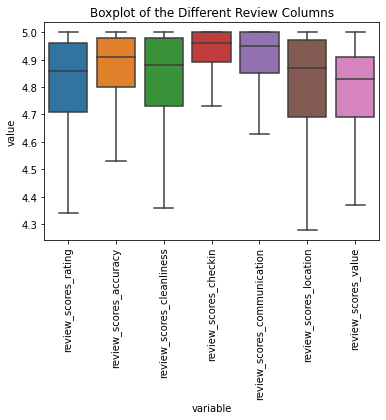

In [13]:
# view the standard deviation of the different review columns to help us decided what to do with NaN values
view_review_std = pd.DataFrame(data = focus, columns = ['review_scores_rating','review_scores_accuracy','review_scores_cleanliness',
                                                        'review_scores_checkin', 'review_scores_communication','review_scores_location',
                                                        'review_scores_value'])

sns.boxplot(x="variable", y="value", data=pd.melt(view_review_std), showfliers=False)
plt.title('Boxplot of the Different Review Columns', fontsize=12)
plt.xticks(rotation=90)

plt.show()

In [14]:
# looks like the mean or median would be a good option for replacing null values
focus['review_scores_accuracy'].describe()

count    5341.000000
mean        4.831558
std         0.299826
min         1.000000
25%         4.800000
50%         4.910000
75%         4.980000
max         5.000000
Name: review_scores_accuracy, dtype: float64

We see that for all the review related columns that the quartiles are pretty close in value, for example the difference from the bottom 25% to the top 75% for `review_score_accuracy` is only 0.15. This suggests that filling the NaN values with the median should be a safe idea since there is a high chance that NaN values would be around the median anyways & is a good representation of the overall data.

In [15]:
# Replace the null values for the review variables with the median for that variable
review_cols = ['review_scores_rating','review_scores_accuracy','review_scores_cleanliness',
               'review_scores_checkin', 'review_scores_communication','review_scores_location',
               'review_scores_value']

[focus[col].fillna(focus[col].median(), inplace=True) for col in focus[review_cols]]

[None, None, None, None, None, None, None]

In [16]:
# double check that the NaNs are gone for the different review columns
focus.isnull().sum()

id                               0
name                             0
description                     28
host_id                          0
host_is_superhost               38
neighbourhood_cleansed           0
latitude                         0
longitude                        0
property_type                    0
room_type                        0
accommodates                     0
bathrooms_text                  16
bedrooms                       303
beds                           122
price                            0
minimum_nights                   0
maximum_nights                   0
availability_30                  0
availability_60                  0
availability_90                  0
availability_365                 0
number_of_reviews                0
review_scores_rating             0
review_scores_accuracy           0
review_scores_cleanliness        0
review_scores_checkin            0
review_scores_communication      0
review_scores_location           0
review_scores_value 

#### remove NaN in `host_is_superhost`

In [17]:
# view value_counts
focus['host_is_superhost'].value_counts()

f    3306
t    2684
Name: host_is_superhost, dtype: int64

In [18]:
# Fill NaN with 'unknown' so it is easier to view & deal with the missing data
focus['host_is_superhost'].fillna('unknown', inplace=True)

In [19]:
# According to airbnb you need to have an overall rating of 4.8 to be superhost, so searching for those with overall rating 
# above 4.8 are most likely a superhost
focus.loc[(focus['host_is_superhost'] == 'unknown') & (focus['review_scores_rating'] >= 4.8), 'host_is_superhost'] = 't'

In [20]:
# those with overall rating under 4.8 are most likely not a superhost
focus.loc[(focus['host_is_superhost'] == 'unknown') & (focus['review_scores_rating'] < 4.8), 'host_is_superhost'] = 'f'

In [21]:
# view value_counts now that NaN values have been replaced
focus['host_is_superhost'].value_counts()

f    3312
t    2716
Name: host_is_superhost, dtype: int64

#### remove NaN in `bedrooms`

In [22]:
# View the value counts of not missing bedrooms data to help me make a decision on what to do with NaN data
focus['bedrooms'].value_counts(normalize=True)

1.0     0.398603
2.0     0.306550
3.0     0.175197
4.0     0.060786
5.0     0.040873
6.0     0.008384
8.0     0.003319
7.0     0.002271
9.0     0.001572
10.0    0.000699
11.0    0.000349
12.0    0.000349
21.0    0.000175
18.0    0.000175
16.0    0.000175
15.0    0.000175
19.0    0.000175
23.0    0.000175
Name: bedrooms, dtype: float64

In [23]:
# Created a new df so I can take a closer look into what would be best to fill the NaN values with
na_bedroom = null_rating = focus[focus['bedrooms'].isnull()]

# check out the number of beds for rows with no bedroom count
# this is telling in what to do with the NaN rows because I would be a good guess that 1 bed is equivalent to 1 bedroom
na_bedroom['beds'].value_counts()

1.0    177
2.0     79
3.0     10
4.0      6
6.0      1
Name: beds, dtype: int64

The number of beds for the NaN number of bedrooms is the most telling in what to do with the NaN rows because we can assume it is a good guess that 1 bed listing is also a 1 bedroom listing. I am also choosing to put 2 beds as 2 bedrooms. However, 3 beds and higher I am choosing to put them all as 3 bedrooms. Many places will say a couch, loft, murphy bed, each layer of a bunk-bed, and blow-up mattress are all considered beds, but we know from the overall count a place with more than 3 bedrooms is very unlikel

In [24]:
# fill NaN with 'unknown' to make it easier to deal with the NaN values
focus['bedrooms'].fillna('unknown', inplace=True)

In [25]:
# make missing bedroom values be replaced with the bed value 
# make stays with 3 and above beds a three bedroom since according to the distribution it is much more unlikely to 
# be a 3+ bedroom place
focus.loc[(focus['bedrooms'] == 'unknown') & (focus['beds'] == 1.0), 'bedrooms'] = 1.0
focus.loc[(focus['bedrooms'] == 'unknown') & (focus['beds'] == 2.0), 'bedrooms'] = 2.0
focus.loc[(focus['bedrooms'] == 'unknown') & (focus['beds'] >= 3.0), 'bedrooms'] = 3.0

In [26]:
# There are still 30 listings where bedrooms is missing
focus['bedrooms'].value_counts()

1.0        2459
2.0        1834
3.0        1020
4.0         348
5.0         234
6.0          48
unknown      30
8.0          19
7.0          13
9.0           9
10.0          4
11.0          2
12.0          2
21.0          1
18.0          1
16.0          1
15.0          1
19.0          1
23.0          1
Name: bedrooms, dtype: int64

In [27]:
# accommodates is another good column to help us make a good guess on number bedrooms
na_bedroom['accommodates'].value_counts()

2    209
4     45
6     14
3     11
5      9
0      7
8      4
1      3
7      1
Name: accommodates, dtype: int64

In [28]:
# placed based on how many people the listing can accommodate
focus.loc[(focus['bedrooms'] == 'unknown') & (focus['accommodates'] >= 1), 'bedrooms'] = 1.0
focus.loc[(focus['bedrooms'] == 'unknown') & (focus['accommodates'] >= 4), 'bedrooms'] = 2.0
focus.loc[(focus['bedrooms'] == 'unknown') & (focus['accommodates'] >= 6), 'bedrooms'] = 3.0

#### look into listings that  `accommodates` 0 people

In [29]:
# Take a look into the specific listings that accommodate 0 people 
na_bedroom.loc[na_bedroom['accommodates'] == 0]

,id,name,description,host_id,host_is_superhost,neighbourhood_cleansed,latitude,longitude,property_type,room_type,...,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
4310,42875637,Federal City Inn & Suites,NaN,266877580,f,U.S. Naval Base,29.947580,-90.032720,Room in hotel,Hotel room,...,0,3,2.33,2.67,1.00,3.67,3.67,2.33,1.67,f
4350,43309157,Hotel Royal,NaN,311387788,f,French Quarter,29.960460,-90.062330,Room in hotel,Hotel room,...,0,0,4.86,4.91,4.88,4.96,4.95,4.87,4.83,f
4351,43309170,Melrose Suites,NaN,311900534,f,Marigny,29.965070,-90.062000,Room in hotel,Hotel room,...,0,0,4.86,4.91,4.88,4.96,4.95,4.87,4.83,f
4352,43309178,Historic Streetcar Inn,NaN,311388965,f,Central City,29.939010,-90.075980,Room in hotel,Hotel room,...,0,0,4.86,4.91,4.88,4.96,4.95,4.87,4.83,f
4353,43309185,Chateau Hotel,NaN,311388674,f,French Quarter,29.959970,-90.061740,Room in hotel,Hotel room,...,0,0,4.86,4.91,4.88,4.96,4.95,4.87,4.83,f
4354,43309194,Audubon Cottages,NaN,311388025,f,French Quarter,29.957980,-90.067800,Room in hotel,Hotel room,...,0,0,4.86,4.91,4.88,4.96,4.95,4.87,4.83,f
5336,49751833,The Old No. 77 Hotel,NaN,267642269,f,Central Business District,29.947905,-90.067505,Room in hotel,Hotel room,...,0,0,4.86,4.91,4.88,4.96,4.95,4.87,4.83,f


In [30]:
# See if there are other row that have accommodates == 0 people 
focus['accommodates'].value_counts()

4     1619
2     1592
6     1167
8      510
10     340
3      228
5      187
16      89
1       77
7       67
12      65
9       26
14      25
15      12
13       9
11       8
0        7
Name: accommodates, dtype: int64

In [31]:
# Drop the 7 rows that have listings which accommodate 0 people
focus.drop(focus.index[focus['accommodates'] == 0], inplace=True)
focus['accommodates'].value_counts()

4     1619
2     1592
6     1167
8      510
10     340
3      228
5      187
16      89
1       77
7       67
12      65
9       26
14      25
15      12
13       9
11       8
Name: accommodates, dtype: int64

#### look into NaN values in `beds`

In [32]:
# See what going on with the missing bedroom data
# remove outliers later
focus['beds'].value_counts(normalize=True)

2.0     0.292584
1.0     0.274467
3.0     0.182188
4.0     0.107179
5.0     0.052150
6.0     0.033695
7.0     0.018456
8.0     0.014561
10.0    0.008466
9.0     0.007450
11.0    0.002032
12.0    0.001693
13.0    0.001185
14.0    0.001185
16.0    0.000677
27.0    0.000508
15.0    0.000339
17.0    0.000339
21.0    0.000169
24.0    0.000169
20.0    0.000169
25.0    0.000169
30.0    0.000169
Name: beds, dtype: float64

In [33]:
# fill NaN with 'unknown' so I can easily find them & change the values
focus['beds'].fillna('unknown', inplace=True)

In [34]:
# make df to look at rows with missing beds
na_beds = focus.loc[focus['beds'] == 'unknown']

In [35]:
# bedrooms is good column help us make a good guess on number bedrooms
na_beds['bedrooms'].value_counts()

1.0    85
2.0    13
3.0    11
4.0     3
6.0     2
5.0     1
Name: bedrooms, dtype: int64

In [36]:
# Choosing fill unknown beds based on number of bedrooms 
focus.loc[(focus['beds'] == 'unknown') & (focus['bedrooms'] == 1.0), 'beds'] = 1.0
focus.loc[(focus['beds'] == 'unknown') & (focus['bedrooms'] >= 2.0), 'beds'] = 2.0
focus.loc[(focus['beds'] == 'unknown') & (focus['bedrooms'] >= 3.0), 'beds'] = 3.0 

# Make sure all the unknown beds are gone
focus['beds'].value_counts(normalize=True)

2.0     0.291978
1.0     0.283342
3.0     0.178708
4.0     0.105132
5.0     0.051154
6.0     0.033051
7.0     0.018103
8.0     0.014283
10.0    0.008304
9.0     0.007308
11.0    0.001993
12.0    0.001661
13.0    0.001163
14.0    0.001163
16.0    0.000664
27.0    0.000498
15.0    0.000332
17.0    0.000332
21.0    0.000166
24.0    0.000166
20.0    0.000166
25.0    0.000166
30.0    0.000166
Name: beds, dtype: float64

#### look into NaN values in `description`

In [37]:
# view NaN values left
focus.isna().sum()

id                              0
name                            0
description                    21
host_id                         0
host_is_superhost               0
neighbourhood_cleansed          0
latitude                        0
longitude                       0
property_type                   0
room_type                       0
accommodates                    0
bathrooms_text                  9
bedrooms                        0
beds                            0
price                           0
minimum_nights                  0
maximum_nights                  0
availability_30                 0
availability_60                 0
availability_90                 0
availability_365                0
number_of_reviews               0
review_scores_rating            0
review_scores_accuracy          0
review_scores_cleanliness       0
review_scores_checkin           0
review_scores_communication     0
review_scores_location          0
review_scores_value             0
instant_bookab

In [38]:
# fill NaN with 'unknown' so I can easily find & view them
focus['description'].fillna('none', inplace=True)

In [39]:
# Make a df so I can easily look at listings with no description
na_description = focus.loc[focus['description'] == 'none']

In [40]:
# Nothing seems off with these listings so I'm going to leave them and change the description to none
na_description.head(5)

,id,name,description,host_id,host_is_superhost,neighbourhood_cleansed,latitude,longitude,property_type,room_type,...,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
1622,19577926,Saratoga suites,none,135150122,f,Central City,29.94308,-90.08050,Entire rental unit,Entire home/apt,...,365,0,4.86,4.91,4.88,4.96,4.95,4.87,4.83,f
2422,26220326,Comfy sofa bed & home cooked meals!,none,58891362,f,Broadmoor,29.94510,-90.09901,Private room in residential home,Private room,...,0,6,5.00,3.67,4.83,4.67,4.83,5.00,4.17,f
2513,27232640,Beautiful & Spacious 3 Bedroom Mid City!,none,26598201,t,Mid-City,29.96758,-90.10172,Entire residential home,Entire home/apt,...,306,37,4.78,4.89,4.89,4.97,4.95,4.89,4.81,t
2841,30893470,Glouster Efficiency,none,179393430,f,West Lake Forest,30.02702,-89.98521,Private room in guest suite,Private room,...,363,0,4.86,4.91,4.88,4.96,4.95,4.87,4.83,f
2850,31026414,Mid City Studio Apartment,none,26598201,t,Mid-City,29.96787,-90.09300,Entire rental unit,Entire home/apt,...,210,31,4.65,4.84,4.71,5.00,4.97,4.81,4.71,f


#### look into NaN values in `bathrooms_text`

In [41]:
# there might be some outliers here that need to be dealt with later
focus['bathrooms_text'].value_counts()

1 bath              2775
2 baths             1423
1 private bath       431
2.5 baths            280
1.5 baths            259
1 shared bath        251
3 baths              231
4 baths              104
3.5 baths             94
2 shared baths        36
4.5 baths             31
1.5 shared baths      25
5.5 baths             14
5 baths               13
6 baths                9
8 baths                6
7 baths                5
2.5 shared baths       4
9.5 baths              4
3 shared baths         3
0 shared baths         2
11 baths               2
7 shared baths         1
7.5 baths              1
12 baths               1
10.5 baths             1
6.5 baths              1
0 baths                1
18 baths               1
21 baths               1
6.5 shared baths       1
9 baths                1
Name: bathrooms_text, dtype: int64

In [42]:
# fill NaN with 'unknown' so I can easily find them
focus['bathrooms_text'].fillna('unknown', inplace=True)

In [43]:
# Make a df so I can easily look at listings with no description
na_bath = focus.loc[focus['bathrooms_text'] == 'unknown']

In [44]:
# bedrooms is good column help us make a good guess on number of bathrooms
na_bath['bedrooms'].value_counts()

1.0     4
2.0     4
11.0    1
Name: bedrooms, dtype: int64

In [45]:
# Choosing fill unknown bathrooms based on number of bedrooms 
focus.loc[(focus['bathrooms_text'] == 'unknown') & (focus['bedrooms'] == 1.0), 'bathrooms_text'] = '1 bath'
focus.loc[(focus['bathrooms_text'] == 'unknown') & (focus['bedrooms'] >= 2.0), 'bathrooms_text'] = '2 baths'

# Make sure all the unknown beds are gone
focus['bathrooms_text'].value_counts(normalize=True)

1 bath              0.461551
2 baths             0.237170
1 private bath      0.071583
2.5 baths           0.046504
1.5 baths           0.043016
1 shared bath       0.041687
3 baths             0.038366
4 baths             0.017273
3.5 baths           0.015612
2 shared baths      0.005979
4.5 baths           0.005149
1.5 shared baths    0.004152
5.5 baths           0.002325
5 baths             0.002159
6 baths             0.001495
8 baths             0.000997
7 baths             0.000830
2.5 shared baths    0.000664
9.5 baths           0.000664
3 shared baths      0.000498
0 shared baths      0.000332
11 baths            0.000332
7 shared baths      0.000166
7.5 baths           0.000166
12 baths            0.000166
10.5 baths          0.000166
6.5 baths           0.000166
0 baths             0.000166
18 baths            0.000166
21 baths            0.000166
6.5 shared baths    0.000166
9 baths             0.000166
Name: bathrooms_text, dtype: float64

#### All NaN data has been accounted for

In [46]:
# Make df for columns that belong in a NLP model
nlp = focus[['id', 'name', 'description']].copy()
nlp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6021 entries, 0 to 6027
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           6021 non-null   int64 
 1   name         6021 non-null   object
 2   description  6021 non-null   object
dtypes: int64(1), object(2)
memory usage: 188.2+ KB


In [47]:
# Make df for the columns needed to map the listings
vis_location = focus[['id', 'latitude', 'longitude', 'neighbourhood_cleansed']].copy()

In [48]:
# Make df for columns that belong in a regression model
drop_focus = ['latitude', 'longitude', 'name', 'description', 'id', 'host_id']
regression = focus.drop(drop_focus, axis = 1)

In [49]:
# Double check there are no NaN values
regression.isnull().sum()

host_is_superhost              0
neighbourhood_cleansed         0
property_type                  0
room_type                      0
accommodates                   0
bathrooms_text                 0
bedrooms                       0
beds                           0
price                          0
minimum_nights                 0
maximum_nights                 0
availability_30                0
availability_60                0
availability_90                0
availability_365               0
number_of_reviews              0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
instant_bookable               0
dtype: int64

In [50]:
# anything rented more than 30 nights is legally a long term rental. These listings are people just using airbnb to 
# market there long term rental properties and should not be considered as short term rentals 
regression.loc[regression['minimum_nights'] >= 30]

,host_is_superhost,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,...,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
10,f,Mid-City,Entire rental unit,Entire home/apt,2,1 bath,1.0,1.0,$110.00,30,...,305,141,4.93,4.96,4.92,4.99,4.97,4.90,4.95,f
23,f,Marigny,Entire rental unit,Entire home/apt,2,1 bath,1.0,1.0,$175.00,30,...,364,80,4.78,4.75,4.44,4.96,4.99,5.00,4.57,f
24,t,Whitney,Entire residential home,Entire home/apt,6,1 bath,2.0,2.0,$70.00,30,...,308,11,5.00,4.91,4.91,5.00,4.91,4.64,4.91,f
26,f,East Riverside,Entire cottage,Entire home/apt,2,1 bath,1.0,1.0,$65.00,30,...,208,127,4.78,4.84,4.64,4.86,4.81,4.81,4.73,f
30,t,St. Thomas Dev,Entire residential home,Entire home/apt,6,1 bath,2.0,3.0,$120.00,30,...,251,169,4.81,4.82,4.80,4.95,4.96,4.54,4.79,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6006,t,Treme - Lafitte,Entire residential home,Entire home/apt,6,1 bath,3.0,3.0,$116.00,30,...,240,0,4.86,4.91,4.88,4.96,4.95,4.87,4.83,f
6015,t,Seventh Ward,Entire residential home,Entire home/apt,15,3 baths,5.0,10.0,$447.00,30,...,59,0,4.86,4.91,4.88,4.96,4.95,4.87,4.83,t
6018,t,Freret,Entire residential home,Entire home/apt,4,2 baths,2.0,2.0,$149.00,30,...,44,0,4.86,4.91,4.88,4.96,4.95,4.87,4.83,f
6021,f,Tulane - Gravier,Entire residential home,Entire home/apt,6,2 baths,3.0,4.0,$145.00,30,...,86,0,4.86,4.91,4.88,4.96,4.95,4.87,4.83,t


In [51]:
#regression.drop(regression.index[regression['minimum_nights'] >= 30], inplace=True)

## 3. Explore
### Data Visualization

Our Exploratory Analysis and Visualizations give us our first look at relationships and possible future complications we might see in our modeling. Overall we saw that price has a possible relationship with many of the columns such as `room_type`, `neighbourhood_cleansed`, and `30_Availability`. When we get to the modeling portion of this analysis we will see how strong these relationship are and find any other relationships among the columns that were not visualized here. We also saw some outliers in some of our visualizations which we will investigate further into next.

First I will do some light scrubbing to make sure all data types are prepared for plotting & visualization. 

In [52]:
# for visualization and modeling we want price to be in float form
regression["price"] = regression["price"].str.replace("$", "", regex=True)
regression["price"] = regression["price"].str.replace(",", "", regex=True)
regression["price"] = regression["price"].astype("float")

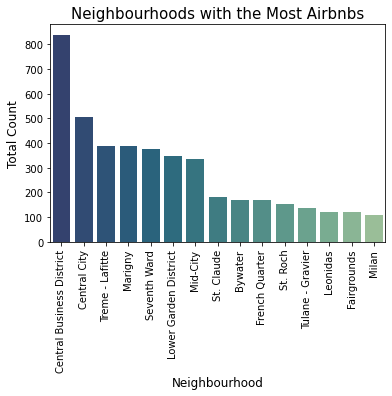

In [53]:
# view neighborhood data by count
plot_order_count = regression.neighbourhood_cleansed.value_counts().iloc[:15].index
sns.countplot(data=regression, x='neighbourhood_cleansed', palette='crest_r',
              order=plot_order_count)
plt.xticks(rotation=90)
plt.xlabel('Neighbourhood', fontsize=12)
plt.ylabel('Total Count', fontsize=12)
plt.title('Neighbourhoods with the Most Airbnbs', fontsize=15)
plt.show()

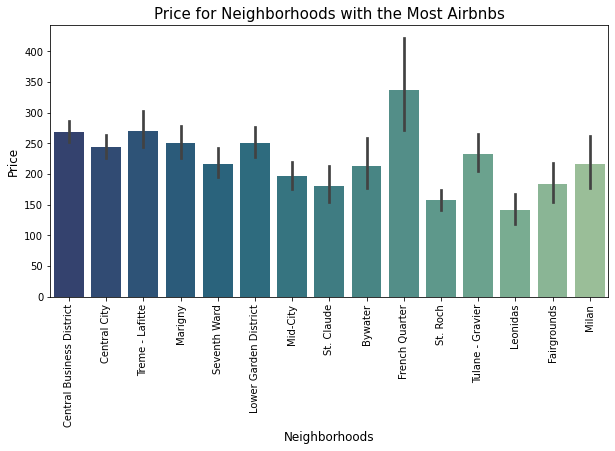

In [54]:
# view average price of the neighborhoods with the most airbnbs
plt.figure(figsize=(10,5))
sns.barplot(x="neighbourhood_cleansed", y="price", data=regression,palette='crest_r',
            order=plot_order_count)
plt.xticks(rotation=90)
plt.xlabel('Neighborhoods', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.title('Price for Neighborhoods with the Most Airbnbs', fontsize=15)
plt.show()

I choose to look at the neighborhoods with the most airbnbs since there is likely a reason why investors choose these areas, such as city rules, tourist attractions, or good house prices for the return 

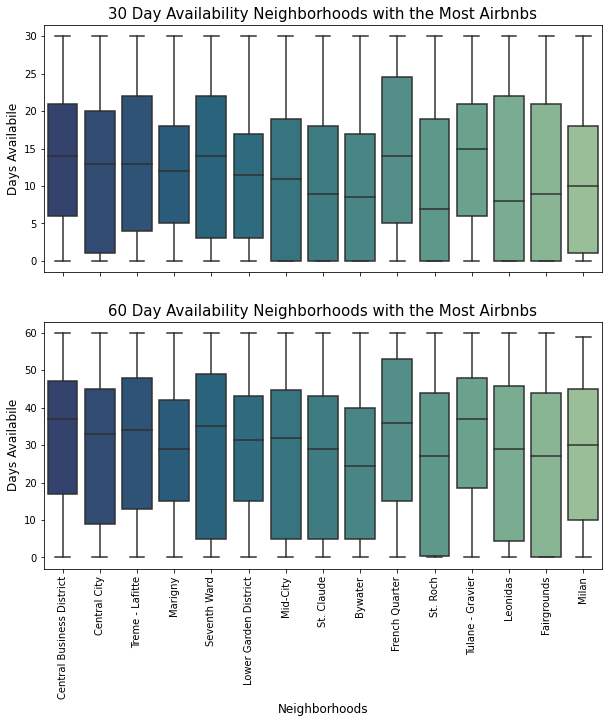

In [55]:
# Plot availability for 30 & 60 days for neighborhoods with the most airbnbs
fig, axs = plt.subplots(nrows=2,sharex=True, figsize=(10,10))

#Plot availability_30 days
sns.boxplot(x="neighbourhood_cleansed", y="availability_30", data=regression,palette='crest_r',
            order=plot_order_count, ax=axs[0])
plt.xticks(rotation=90)
ax=axs[0].set_xlabel('', fontsize=12)
ax=axs[0].set_ylabel('Days Availabile', fontsize=12)
ax=axs[0].set_title('30 Day Availability Neighborhoods with the Most Airbnbs', fontsize=15)

# Plot availability_60 days
sns.boxplot(x="neighbourhood_cleansed", y="availability_60", data=regression,palette='crest_r',
            order=plot_order_count, ax=axs[1])
plt.xticks(rotation=90)
ax=axs[1].set_xlabel('Neighborhoods', fontsize=12)
ax=axs[1].set_ylabel('Days Availabile', fontsize=12)
ax=axs[1].set_title('60 Day Availability Neighborhoods with the Most Airbnbs', fontsize=15)
plt.show()


plt.show()

It is important to look at the availability, 30 & 60 day is more telling than 365 days because according to Airbnb most people book 28 days before they travel. Having little availability at 30 or 60 days is a good sign that the Neighbourhood is highly sought after by tourists and good business for the Airbnb owners.

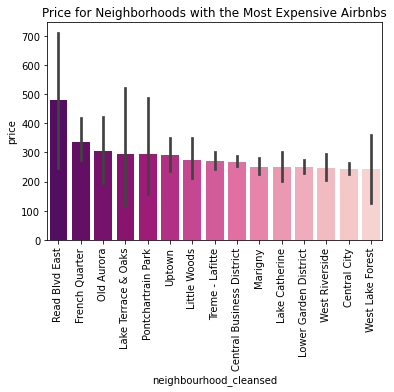

In [56]:
# View neighborhoods with the highest price
plot_order_price = regression.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=False).iloc[:15].index.values
color = sns.color_palette("RdPu_r", 18)
sns.barplot(data=regression, x='neighbourhood_cleansed', y='price', palette=color,
              order=plot_order_price)
plt.title('Price for Neighborhoods with the Most Expensive Airbnbs', fontsize=12)
plt.xticks(rotation=90)
plt.show()

Looking at the neighborhoods with the highest priced Airbnbs gives us an indication of which towns might be the most desirable for both travelers & investors. 

In [57]:
# Make list of top neighborhoods by count to use in visualizations
top_count = regression.neighbourhood_cleansed.value_counts().iloc[:15].index
top_count

Index(['Central Business District', 'Central City', 'Treme - Lafitte',
       'Marigny', 'Seventh Ward', 'Lower Garden District', 'Mid-City',
       'St. Claude', 'Bywater', 'French Quarter', 'St. Roch',
       'Tulane - Gravier', 'Leonidas', 'Fairgrounds', 'Milan'],
      dtype='object')

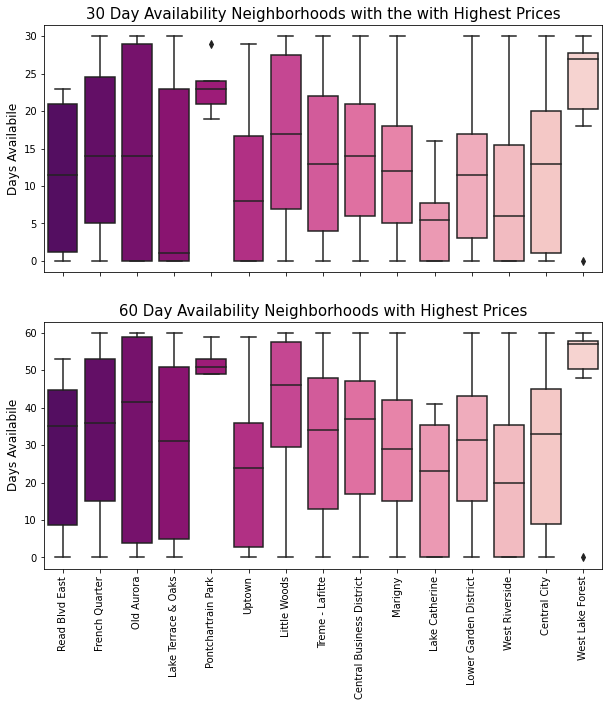

In [58]:
# View neighborhoods with the highest price
plot_order_price = regression.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=False).iloc[:15].index.values
color = sns.color_palette("RdPu_r", 18)

# Plot availability for 30 & 60 days for neighborhoods with the highest priced airbnbs
fig, axs = plt.subplots(nrows=2,sharex=True, figsize=(10,10))

sns.boxplot(data=regression, x='neighbourhood_cleansed', y='availability_30', palette=color,
              order=plot_order_price, ax=axs[0])
ax=axs[0].set_xlabel('', fontsize=12)
ax=axs[0].set_ylabel('Days Availabile', fontsize=12)
ax=axs[0].set_title('30 Day Availability Neighborhoods with the with Highest Prices', fontsize=15)
plt.xticks(rotation=90)

# Plot availability for 30 & 60 days for neighborhoods with the highest priced airbnbs
sns.boxplot(data=regression, x='neighbourhood_cleansed', y='availability_60', palette=color,
              order=plot_order_price, ax=axs[1])
ax=axs[1].set_xlabel('', fontsize=12)
ax=axs[1].set_ylabel('Days Availabile', fontsize=12)
ax=axs[1].set_title('60 Day Availability Neighborhoods with Highest Prices', fontsize=15)
plt.xticks(rotation=90)

plt.show()

Again we look at availability since many investors believe this is the most important statistic for estimating profits. As a lower priced rental that is booked more can make much more than an expensive less booked rental in some situations. 

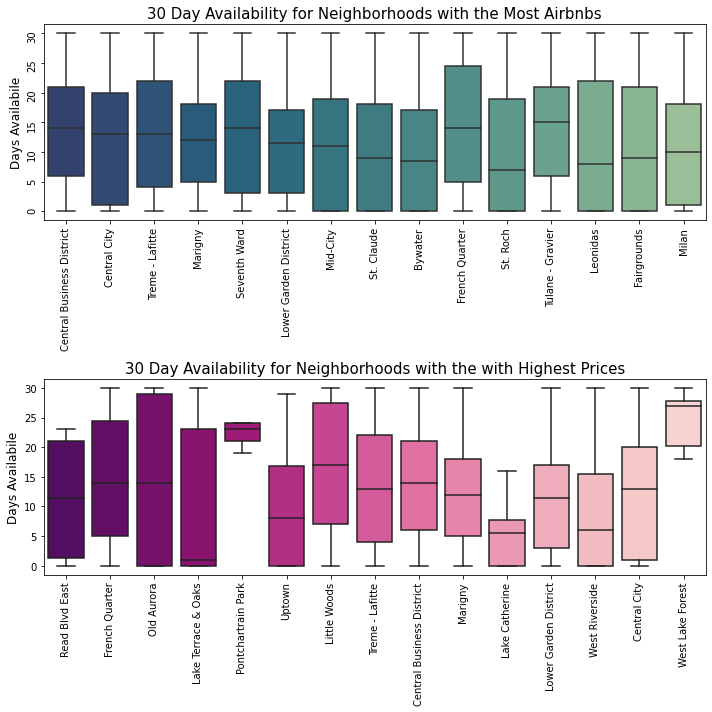

In [59]:
# Plot availability for 30 & 60 days for neighborhoods with the most airbnbs
fig, axs = plt.subplots(nrows=2,sharex=False, figsize=(10,10))

#Plot availability_30 days for neighbourhoods with the most airbnbs
sns.boxplot(x="neighbourhood_cleansed", y="availability_30", data=regression,palette='crest_r',
            order=plot_order_count, ax=axs[0], showfliers=False)
plt.xticks(rotation=90)
ax=axs[0].set_xlabel('', fontsize=12)
ax=axs[0].set_ylabel('Days Availabile', fontsize=12)
ax=axs[0].set_title('30 Day Availability for Neighborhoods with the Most Airbnbs', fontsize=15)
ax=axs[0].tick_params(labelrotation=90)

# Plot availability_30 days for highest priced neighbourhoods
sns.boxplot(data=regression, x='neighbourhood_cleansed', y='availability_30', palette=color,
              order=plot_order_price, ax=axs[1], showfliers=False)
ax=axs[1].set_xlabel('', fontsize=12)
ax=axs[1].set_ylabel('Days Availabile', fontsize=12)
ax=axs[1].set_title('30 Day Availability for Neighborhoods with the with Highest Prices', fontsize=15)
plt.xticks(rotation=90)

fig.tight_layout()
plt.show()

Visualizing the difference between the most common neighborhoods and the highest priced neighborhoods gives a better understanding of the overall market. We see that 'Central City', 'Lower Garden District', 'Marigny', 'Central Business District', 'Treme - Lafitte', 'French Quarter' are all neighborhoods that are both part of the highest count and highest priced neighborhoods.

In [60]:
# import geojson file for mapping lat long
nb = 'neighbourhoods.geojson'
regions = gpd.read_file('Data/neighbourhoods.geojson')
regions.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   neighbourhood        72 non-null     object  
 1   neighbourhood_group  0 non-null      object  
 2   geometry             72 non-null     geometry
dtypes: geometry(1), object(2)
memory usage: 1.8+ KB


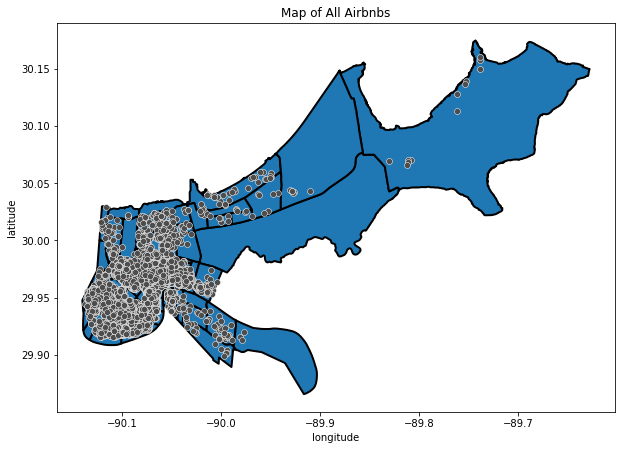

In [61]:
# plot all the airbnbs
ax = regions.plot(figsize=(10,10),
                edgecolor="black",
                linewidth=2)
sns.scatterplot(x = vis_location.longitude, y=vis_location.latitude, color=".3")
plt.title('Map of All Airbnbs')
plt.ioff()

In [62]:
# Heatmap to see all airbnbs 
map_heat = folium.Map(location=[vis_location.latitude.mean(), 
                           vis_location.longitude.mean()], 
                           zoom_start=11, control_scale=True)

# Heatmap to view map of areas with the highest count of airbnbs
map_heat_top_count = folium.Map(location=[vis_location.latitude.mean(), 
                           vis_location.longitude.mean()], 
                           zoom_start=11, control_scale=True)

# Heatmap to view map of highest priced airbnbs
map_heat_top_price = folium.Map(location=[vis_location.latitude.mean(), 
                           vis_location.longitude.mean()], 
                           zoom_start=11, control_scale=True)

In [63]:
# dataframe to view areas with the most airbnbs
top_count_df =vis_location.loc[vis_location.neighbourhood_cleansed.isin(top_count)]

# dataframe to view areas with the highest priced airbnbs
top_price_df =vis_location.loc[vis_location.neighbourhood_cleansed.isin(plot_order_price)]

In [64]:
# heatmap of all airbnbs
HeatMap(vis_location[['latitude','longitude']], radius=8,gradient={0.2:'blue',0.4:'lime',0.6:'orange',1.0:'darkred'}).add_to(map_heat)
display(map_heat)

In [65]:
# heatmap of areas with the most airbnbs
HeatMap(top_count_df[['latitude','longitude']], radius=8,gradient={0.2:'blue',0.4:'lime',0.6:'orange',1.0:'darkred'}).add_to(map_heat_top_count)
display(map_heat_top_count)

In [66]:
# heatmap of areas with highest priced airbnbs
HeatMap(top_price_df[['latitude','longitude']], radius=8,gradient={0.2:'blue',0.4:'lime',0.6:'orange',1.0:'darkred'}).add_to(map_heat_top_price)
display(map_heat_top_price)

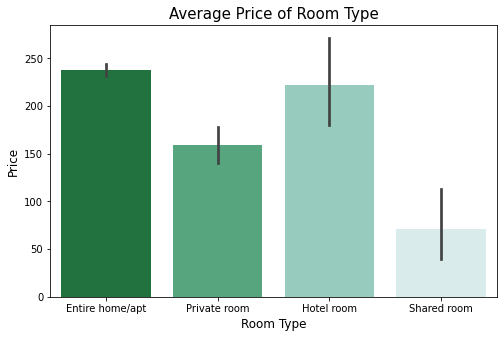

In [67]:
# Take a look at possible relationship between Price and Room Type
plt.figure(figsize=(8,5))
sns.barplot(x="room_type", y="price", data=regression, palette = 'BuGn_r')
plt.xlabel('Room Type', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.title('Average Price of Room Type', fontsize=15)
plt.show()

To get a better understanding of what type of property is more valued by travelers we see which has the highest average price. 

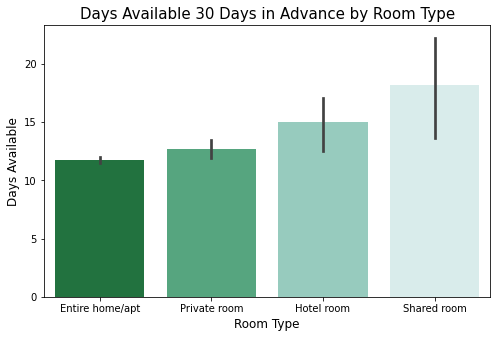

In [68]:
# Take a look at possible relationship between availability and Room Type
plt.figure(figsize=(8,5))
sns.barplot(x="room_type", y="availability_30", data=regression, palette = 'BuGn_r')
#plt.xticks(rotation=90)
plt.xlabel('Room Type', fontsize=12)
plt.ylabel('Days Available', fontsize=12)
plt.title('Days Available 30 Days in Advance by Room Type', fontsize=15)
plt.show()

Less availability is better, we see here this visual suggests that renting out an Entire home has a better chance of being booked more.

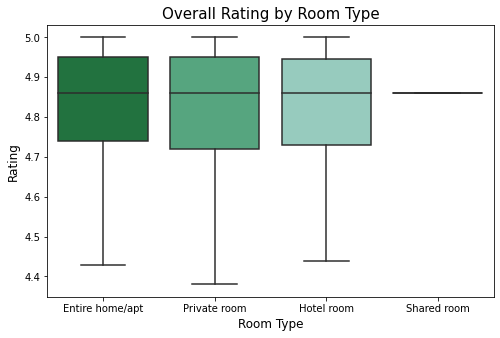

In [69]:
# Take a look at possible the relationship between rating and Room Type
plt.figure(figsize=(8,5))
sns.boxplot(x="room_type", y="review_scores_rating", data=regression, palette = 'BuGn_r', showfliers=False)
plt.xlabel('Room Type', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.title('Overall Rating by Room Type', fontsize=15)
plt.show()

The above visual shows us that the average review does'nt change by much based on room type.

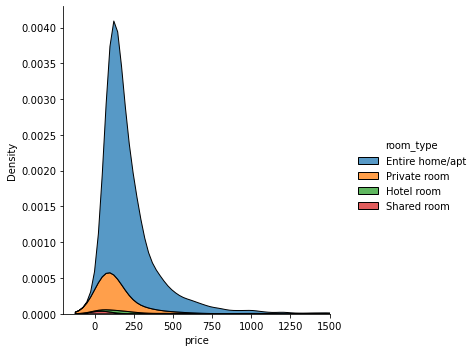

In [70]:
# check distribution of room type
sns.displot(regression, x="price", hue="room_type", fill=True, multiple="stack",  kind="kde")
plt.xlim(-200, 1500)
plt.show()

This visual is a warning that the data is very unbalanced. The majority of rows pertaining to the Entire Home category suggest the model might have a hard time predicting price for other room type categories since there is less of that data for the model to build off of.

In [71]:
# take a closer look at the balance of the categories
regression['room_type'].value_counts()

Entire home/apt    5108
Private room        813
Hotel room           63
Shared room          37
Name: room_type, dtype: int64

In [72]:
# take a look at 'property_type' which is similar to room-type
regression['property_type'].value_counts().head(10)

Entire residential home             2101
Entire rental unit                  1637
Entire condominium (condo)           562
Private room in residential home     389
Entire guest suite                   235
Entire townhouse                     185
Entire guesthouse                    136
Room in boutique hotel               125
Entire cottage                        79
Private room in rental unit           77
Name: property_type, dtype: int64

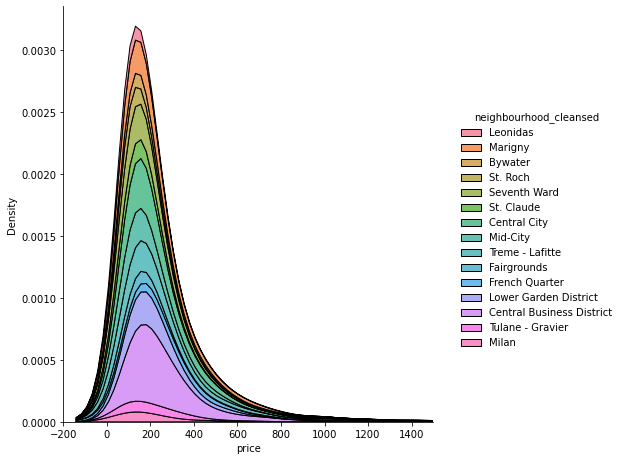

In [73]:
# see how balanced the neighborhood data is
sns.displot(data=regression.loc[regression.neighbourhood_cleansed.isin(plot_order_count)], x="price", hue="neighbourhood_cleansed",
            fill=True, multiple="stack",  kind="kde", height=6.5, aspect=0.99)
plt.xlim(-200, 1500)
plt.show()

This visual is hard to read but shows that even for the neighborhoods with the highest number of airbnbs there are still distribution issues. This unbalanced data can cause issues for predictive models.

## 4. Preprocessing

### Data preprocessing & Continued Exploratory Analysis
Further exploratory analysis will give us a better look at outliers, multicollinearity, normality, and homoscedasticity. Exploratory analysis is a good way to better understand what preprocessing steps need to be made as we prepare for modeling.

Before we remove outliers or do any more preprocessing I will split the data into test and training sets to avoid data leakage.

In [136]:
# rename columns to make them easier to understand
regression.rename(columns = {'bathrooms_text': 'bathrooms', 'neighbourhood_cleansed':'neighbourhood'}, inplace=True)

In [75]:
# perform a test train split
df_train, df_test = train_test_split(regression,random_state=42)
df_train.shape,df_test.shape

((4515, 24), (1506, 24))

Before outliers are removed we should run through some basic filter methods to make sure that we do not have constant or duplicated features. Even though this dataset does not have a ton of different features, it still is good practice to check for constant features. These are features that show a high percentage of the same value & they should be removed because in essence they are the same.

In [76]:
# check for quasi constant numerical variables
num_cols = ['bedrooms', 'beds', 'accommodates','price',
       'maximum_nights', 'minimum_nights','availability_30',
       'availability_365', 'number_of_reviews',
       'review_scores_rating','availability_90',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value']

thresh = VarianceThreshold(threshold=0.01)  

thresh.fit(df_train[num_cols])

VarianceThreshold(threshold=0.01)

In [77]:
# double check that our variables are stored
sum(thresh.get_support())

16

In [78]:
# let's print the number of quasi-constant features & we see that there are no numerical columns that are quasi_constant
quasi_constant = df_train[num_cols].columns[~thresh.get_support()]

len(quasi_constant)

0

In [79]:
# create an empty list
cat_cols = ['host_is_superhost', 'neighbourhood', 'property_type', 'room_type','instant_bookable']
train_cat = df_train[cat_cols]

quasi_constant_var = []

# iterate over every feature
for var in train_cat.columns:

    # find predominant value for each variable
    predominant = train_cat[var].value_counts(
        normalize=True).sort_values(ascending=False).values[0]

    # 99% of values are the same
    if predominant > 0.998:

        # make list if yest
        quasi_constant_feat.append(var)

len(quasi_constant_var)

0

#### Remove outliers
Only remove outliers from the training set. Removing a lot of outliers is not ideal since we don't want to lose data. From data exploration we know that there are extreme outliers in many of the columns. With this dataset being smaller removing outliers will hopefully help our model's performance. 

In [80]:
# Make functions to easily view distribution
def plot_distribution(df_train, col='price'):
    # Plot displot + mean and mean
    median = df_train[col].median()
    mean = df_train[col].mean()
    fig, ax = plt.subplots(figsize=(5,5))
    sns.histplot(data=df_train[col], ax=ax)

    ax.set_title(F"Distribution of {col}")
    ax.axvline(median,label=f'median={median:,}',color='black')
    ax.axvline(mean,label=f'mean={mean:,}',color='black',ls=':')
    ax.legend()

In [81]:
# Make a function to find outlier using IQR method
# I want to keep as much data as possible so I am making my q1 small and my q3 large that the typical 4 even quantiles

def find_outliers_IQR(df_train):
    q1 = df_train.quantile(0.15)
    q3 = df_train.quantile(0.85)
    thresh = 1.5*(q3-q1)
    idx_outliers =(df_train < (q1-thresh)) | (df_train > (q3+thresh))
    return idx_outliers

In [82]:
# function to create histogram, Q-Q plot and boxplot

def diagnostic_plots(df_train, variable):
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    median = df_train[variable].median()
    mean = df_train[variable].mean()
    sns.histplot(df_train[variable], bins=40)
    
    plt.title(F"Distribution of {variable}")
    plt.axvline(median,label=f'median={median:,}',color='black')
    plt.axvline(mean,label=f'mean={mean:,}',color='black',ls=':')
    plt.legend()

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df_train[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df_train[variable])
    plt.title('Boxplot')

    plt.show()

In [83]:
# print the number of rows that contain outliers in price
price_outliers_IQR = find_outliers_IQR(df_train['price'])
price_outliers_IQR.sum()

141

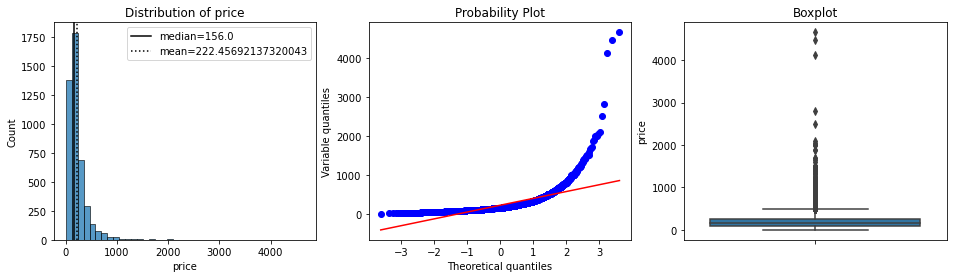

In [84]:
# Price is skewed and the outliers are impacting the normalcy
diagnostic_plots(df_train, 'price')

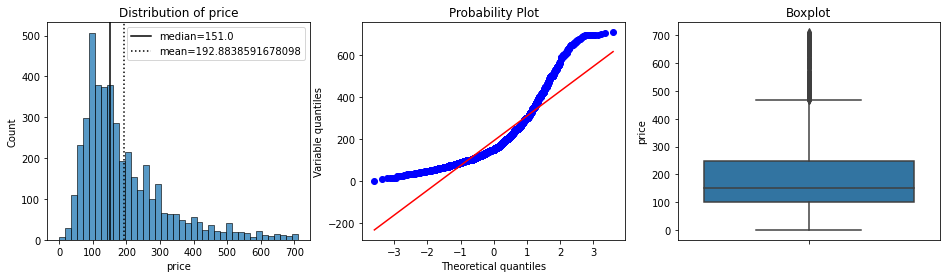

In [85]:
# See how removing these outliers would change the distribution
df_train = df_train[~price_outliers_IQR].copy()

# Remove outliers for visualization df 
diagnostic_plots(df_train, 'price')

All three plots indicate that removing the outliers have helped with normality.

In [86]:
# see if any listings have price set at $0
df_train.loc[df_train['price'] == 0]

,host_is_superhost,neighbourhood,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,...,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
4228,t,Marigny,Room in boutique hotel,Hotel room,4,1 bath,1.0,1.0,0.0,1,...,0,15,5.0,5.0,4.87,4.87,5.0,4.87,4.93,f


In [87]:
# drop row with price as $0
df_train.drop(4228, axis=0, inplace=True)

In [88]:
# see if any listings have price set at $0 in test set
df_test.loc[df_test['price'] == 0]

,host_is_superhost,neighbourhood,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,...,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
4280,f,Mid-City,Room in hotel,Hotel room,8,1 bath,1.0,1.0,0.0,1,...,0,0,4.86,4.91,4.88,4.96,4.95,4.87,4.83,f


In [89]:
# drop row with price as $0 in test set
df_test.drop(4280, axis=0, inplace=True)

In [90]:
# See about removing bedroom outliers
bedrooms_outliers_IQR = find_outliers_IQR(df_train['bedrooms'])
bedrooms_outliers_IQR.sum()

18

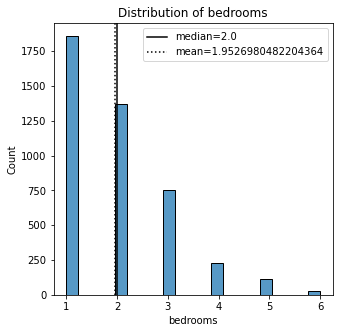

In [91]:
# visualize how many bedroom categories will be left after removing outliers
find_bedrooms = df_train[~bedrooms_outliers_IQR]
plot_distribution(find_bedrooms, 'bedrooms')

In [92]:
# See about removing bedroom outliers
beds_outliers_IQR = find_outliers_IQR(df_train['beds'])
beds_outliers_IQR.sum()

56

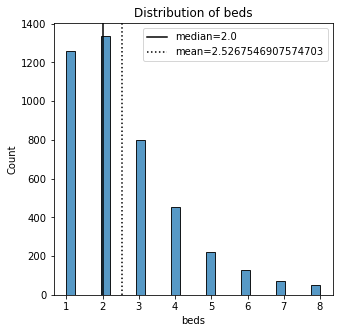

In [93]:
# visualize how many bedroom categories will be left after removing outliers
find_beds = df_train[~beds_outliers_IQR]
plot_distribution(find_beds, 'beds')

In [94]:
# create function to view distribution of the different columns related to reviews
review_cols = ['review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'number_of_reviews']

def diagnostic_reviews(df_train, review_cols):
    
    fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10,10), sharey=True)

    for col, ax in zip(review_cols, axes.flatten()):
        ax.hist(df_train[col], bins='auto')
        ax.set_title(col)
    
        median = df_train[col].median()
        mean = df_train[col].mean()
    
        ax.set_title(F"Distribution of {col}")
        ax.axvline(median,label=f'median={median:,}',color='black')
        ax.axvline(mean,label=f'mean={mean:,}',color='black',ls=':')
        ax.legend()
 
    fig.tight_layout()

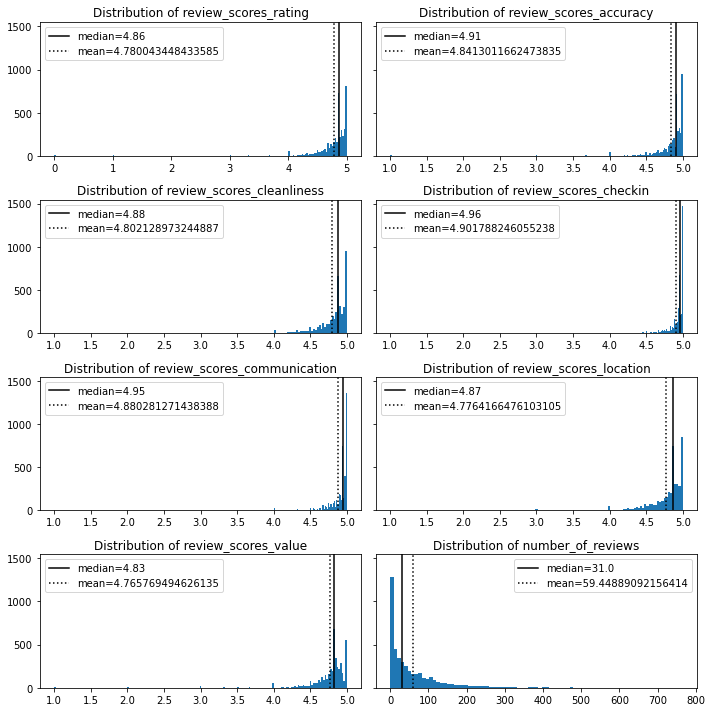

In [95]:
# viewing the distribution shows us that there are extreme outliers impacting the normality of this data
diagnostic_reviews(df_train, review_cols)

In [96]:
# print the number of rows that contain outliers in review_scores_rating
review_scores_rating_outliers_IQR = find_outliers_IQR(df_train['review_scores_rating'])
review_scores_rating_outliers_IQR.sum()

113

In [97]:
# print the number of rows that contain outliers in review_scores_location
review_scores_location_outliers_IQR = find_outliers_IQR(df_train['review_scores_location'])
review_scores_location_outliers_IQR.sum()

72

In [98]:
# print the number of rows that contain outliers in review_scores_communication
review_scores_communication_outliers_IQR = find_outliers_IQR(df_train['review_scores_communication'])
review_scores_communication_outliers_IQR.sum()

145

In [99]:
# print the number of rows that contain outliers in review_scores_checkin
review_scores_checkin_outliers_IQR = find_outliers_IQR(df_train['review_scores_checkin'])
review_scores_checkin_outliers_IQR.sum()

191

In [100]:
# print the number of rows that contain outliers in review_scores_cleanliness
review_scores_cleanliness_outliers_IQR = find_outliers_IQR(df_train['review_scores_cleanliness'])
review_scores_cleanliness_outliers_IQR.sum()

99

In [101]:
# print the number of rows that contain outliers in review_scores_accuracy
review_scores_accuracy_outliers_IQR = find_outliers_IQR(df_train['review_scores_accuracy'])
review_scores_accuracy_outliers_IQR.sum()

130

In [102]:
# print the number of rows that contain outliers in review_scores_value
review_scores_value_outliers_IQR = find_outliers_IQR(df_train['review_scores_value'])
review_scores_value_outliers_IQR.sum()

122

In [103]:
# print the number of rows that contain outliers in minimum_nights
min_night_outliers_IQR = find_outliers_IQR(df_train['minimum_nights'])
min_night_outliers_IQR.sum()

29

In [104]:
# print the number of rows that contain outliers in maximum_nights
max_night_outliers_IQR = find_outliers_IQR(df_train['maximum_nights'])
max_night_outliers_IQR.sum()

1

In [105]:
# print the number of rows that contain outliers in number_of_reviews
number_reviews_IQR = find_outliers_IQR(df_train['number_of_reviews'])
number_reviews_IQR.sum()

92

In [106]:
# Again we want to remove as few rows as possible so for bathrooms we will make a 5 or more columns instead
df_train.loc[df_train['bathrooms'].str.contains("1|0"),'bathrooms'] = '1 bath'
df_train.loc[df_train['bathrooms'].str.contains("2"),'bathrooms'] = '2 baths'
df_train.loc[df_train['bathrooms'].str.contains("3"),'bathrooms'] = '3 baths'
df_train.loc[df_train['bathrooms'].str.contains("4"),'bathrooms'] = '4 baths'
df_train.loc[df_train['bathrooms'].str.contains("5|6|7|8|9"),'bathrooms'] = '5 or more baths'

#same for test set
df_test.loc[df_test['bathrooms'].str.contains("1|0"),'bathrooms'] = '1 bath'
df_test.loc[df_test['bathrooms'].str.contains("2"),'bathrooms'] = '2 baths'
df_test.loc[df_test['bathrooms'].str.contains("3"),'bathrooms'] = '3 baths'
df_test.loc[df_test['bathrooms'].str.contains("4"),'bathrooms'] = '4 baths'
df_test.loc[df_test['bathrooms'].str.contains("5|6|7|8|9"),'bathrooms'] = '5 or more baths'

df_train['bathrooms'].value_counts()

1 bath             2805
2 baths            1293
3 baths             196
4 baths              62
5 or more baths      17
Name: bathrooms, dtype: int64

In [107]:
# Remove outliers from the training dataset
rating_outliers = (review_scores_rating_outliers_IQR | review_scores_value_outliers_IQR | 
                              review_scores_checkin_outliers_IQR | review_scores_communication_outliers_IQR |
                              review_scores_location_outliers_IQR | review_scores_accuracy_outliers_IQR |
                              review_scores_cleanliness_outliers_IQR | min_night_outliers_IQR | max_night_outliers_IQR|
                              beds_outliers_IQR | bedrooms_outliers_IQR | number_reviews_IQR)

df_train = df_train[~rating_outliers].copy()

In [108]:
# make df_clean 
df_train.shape

(3793, 24)

df_train started with 4515 rows and ended with 3793 rows

In [109]:
# look at the distribution of the numerical data as we prepare for encoding that categorical variables
review_num = ['price', 'accommodates', 'maximum_nights', 'minimum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews' ]

def diagnostic_reviews_num(df_train, review_num):
    
    fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10,10), sharey=False)

    for col, ax in zip(review_num, axes.flatten()):
        ax.hist(df_train[col], bins='auto')
        ax.set_title(col)
    
        median = df_train[col].median()
        mean = df_train[col].mean()
    
        ax.set_title(F"Distribution of {col}")
        ax.axvline(median,label=f'median={median:,}',color='black')
        ax.axvline(mean,label=f'mean={mean:,}',color='black',ls=':')
        ax.legend()
 
    fig.tight_layout()

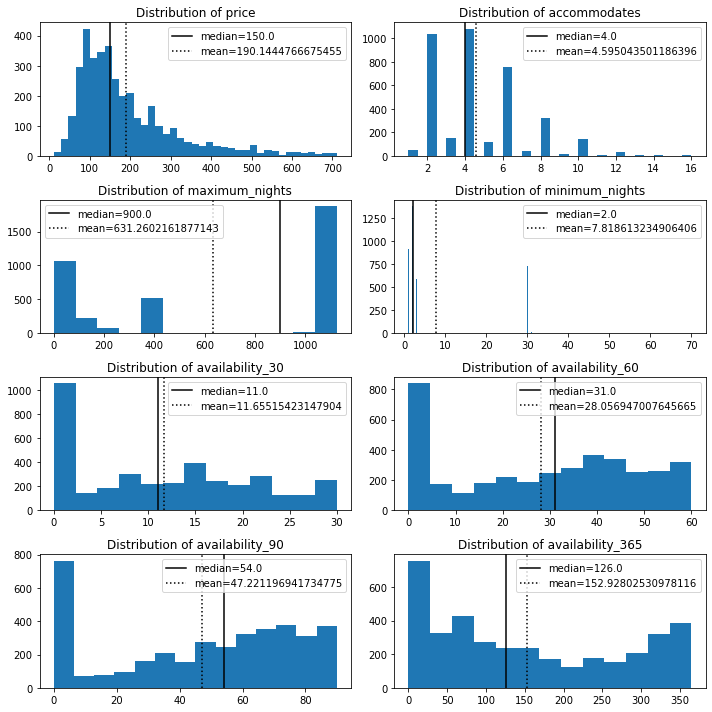

In [110]:
diagnostic_reviews_num(df_train, review_num)

In [111]:
# check to make sure minimum_nights shouldnt be considered a categorical feature
df_train['minimum_nights'].value_counts()

2     1385
1      913
30     736
3      592
4       61
5       28
7       23
31      15
6        8
60       8
28       7
15       4
14       3
10       2
32       2
29       1
70       1
12       1
18       1
9        1
59       1
Name: minimum_nights, dtype: int64

In [112]:
# ordinal encoder
ordinal_enc = OrdinalEncoder(
    encoding_method='arbitrary',
    variables=['host_is_superhost', 'bathrooms', 'beds', 'bedrooms'])

ordinal_enc.fit(df_train)
#ordinal_enc.fit(df_test_encoded)

OrdinalEncoder(encoding_method='arbitrary',
               variables=['host_is_superhost', 'bathrooms', 'beds', 'bedrooms'])

In [113]:
# make sure that everything looks good for the ordinal encoder
ordinal_enc.encoder_dict_

{'host_is_superhost': {'t': 0, 'f': 1},
 'bathrooms': {'1 bath': 0,
  '2 baths': 1,
  '3 baths': 2,
  '4 baths': 3,
  '5 or more baths': 4},
 'beds': {1.0: 0, 3.0: 1, 2.0: 2, 4.0: 3, 6.0: 4, 5.0: 5, 8.0: 6, 7.0: 7},
 'bedrooms': {1.0: 0, 2.0: 1, 4.0: 2, 3.0: 3, 5.0: 4, 6.0: 5}}

In [114]:
# need to set a max for the test set for beds or bedrooms or we will get NaN when encoding the test set
df_test.loc[(df_test['bedrooms'] >= 6.0), 'bedrooms'] = 6.0
df_test.loc[(df_test['beds'] >= 7.0), 'beds'] = 7.0

In [115]:
# encode the test and training sets
df_train_ord = ordinal_enc.transform(df_train)
df_test_ord = ordinal_enc.transform(df_test)

In [116]:
# make sure there is no NaN values created during encoding
df_test_ord.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1505 entries, 5113 to 4410
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_is_superhost            1505 non-null   int64  
 1   neighbourhood                1505 non-null   object 
 2   property_type                1505 non-null   object 
 3   room_type                    1505 non-null   object 
 4   accommodates                 1505 non-null   int64  
 5   bathrooms                    1505 non-null   int64  
 6   bedrooms                     1505 non-null   int64  
 7   beds                         1505 non-null   int64  
 8   price                        1505 non-null   float64
 9   minimum_nights               1505 non-null   int64  
 10  maximum_nights               1505 non-null   int64  
 11  availability_30              1505 non-null   int64  
 12  availability_60              1505 non-null   int64  
 13  availability_90

In [117]:
# use one hot encoder on the remaining categorical variables
ohe_enc = fe_OneHotEncoder(variables=['neighbourhood', 'property_type',
                                      'room_type', 'instant_bookable'], drop_last=True)

# fit to df_train
ohe_enc.fit(df_train_ord)

OneHotEncoder(drop_last=True,
              variables=['neighbourhood', 'property_type', 'room_type',
                         'instant_bookable'])

In [118]:
# ignore warning
warnings.filterwarnings('ignore')

# transform training set
df_train_encoded = ohe_enc.transform(df_train_ord)

In [119]:
# ignore warning
warnings.filterwarnings('ignore')

# transform the test set
df_test_encoded = ohe_enc.transform(df_test_ord)

In [120]:
# Make sure train set looks right
df_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3793 entries, 2025 to 860
Columns: 134 entries, host_is_superhost to instant_bookable_t
dtypes: float64(8), int64(126)
memory usage: 3.9 MB


In [121]:
# Make sure test set looks right
df_test_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1505 entries, 5113 to 4410
Columns: 134 entries, host_is_superhost to instant_bookable_t
dtypes: float64(8), int64(126)
memory usage: 1.6 MB


In [122]:
# see which predictors have high correlation which each other
correlation = df_train_encoded.corr().abs().stack().reset_index().sort_values(0, ascending=False)

correlation['pairs'] = list(zip(correlation.level_0, correlation.level_1))

correlation.set_index(['pairs'], inplace = True)

correlation.drop(columns=['level_1', 'level_0'], inplace = True)

correlation.columns = ['corr_coef']

correlation[(correlation.corr_coef>.75) & (correlation.corr_coef<1)]

,corr_coef
pairs,
"(availability_90, availability_60)",0.951020
"(availability_60, availability_90)",0.951020
"(room_type_Private room, room_type_Entire home/apt)",0.932969
"(room_type_Entire home/apt, room_type_Private room)",0.932969
"(availability_60, availability_30)",0.921863
"(availability_30, availability_60)",0.921863
"(availability_30, availability_90)",0.840949
"(availability_90, availability_30)",0.840949
"(accommodates, bedrooms)",0.800725


When two columns have a high correlation it will hurt the model's performance. To help solve the issue of multicollinearity we will eliminate one column from each highly correlated pair. In this case I will remove `availability_90`, `property_type_Shared room in residential home`, `availability_60`, `accommodates`, `review_scores_value` and `review_scores_accuracy`.

In [123]:
# Remove one column from each highly correlated pair
df_train_encoded.drop(['availability_90','room_type_Entire home/apt', 'review_scores_accuracy', 'accommodates',
                      'availability_60', 'review_scores_value'], axis=1, inplace=True)

In [124]:
# Remove same columns from the test set
df_test_encoded.drop(['availability_90','room_type_Entire home/apt', 'review_scores_accuracy', 'accommodates',
                      'availability_60', 'review_scores_value'], axis=1, inplace=True)

We know that a few of the continious variables are very skewed, which could have a negative impact on our model. Before we move onto modeling we should try to eliviate some of the skewiness with a transfomation. 

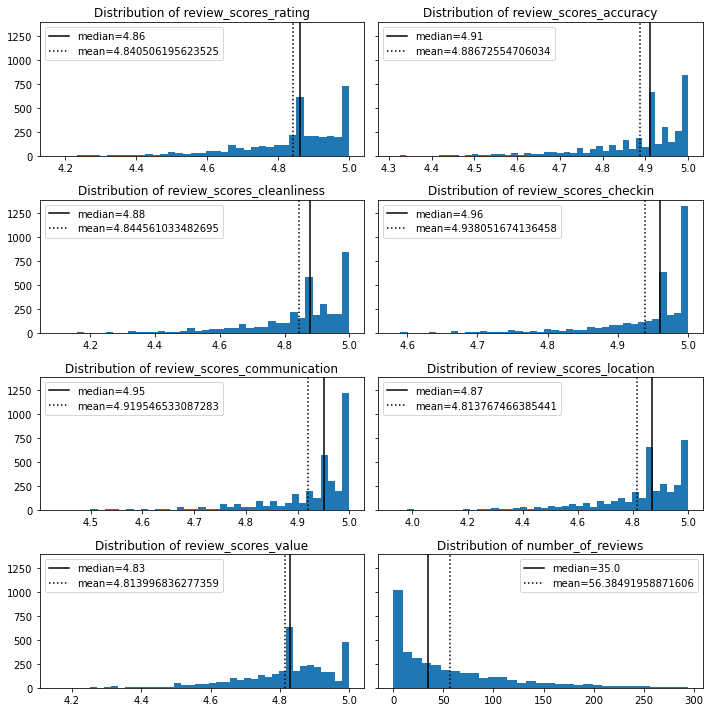

In [125]:
# recall the skewed variables
diagnostic_reviews(df_train, review_cols)

In [126]:
# take a look at how skewed the continuous features are

def print_skewness(df):
    print(f'''The skewness of the cleanliness score is:\
    {df["review_scores_cleanliness"].skew():.2f}''')

    print(f'''The skewness of the overall rating is:\
     {df["review_scores_rating"].skew():.2f}''')

    print(f'''The skewness of the communication score is: \
     {df["review_scores_communication"].skew():.2f}''')

    print(f'''The skewness of the location score is: \
     {df["review_scores_location"].skew():.2f}''')

    print(f'''The skewness of the checkin score is: \
     {df["review_scores_checkin"].skew():.2f}''')

    print(f'''The skewness of the number of reviews is: \
     {df["number_of_reviews"].skew():.2f}''')

    print(f'''The skewness of the price is: \
     {df["price"].skew():.2f}''')

In [127]:
# view skewness
print_skewness(df_train_encoded)

The skewness of the cleanliness score is:    -1.64
The skewness of the overall rating is:     -1.40
The skewness of the communication score is:      -1.93
The skewness of the location score is:      -1.70
The skewness of the checkin score is:      -1.88
The skewness of the number of reviews is:      1.45
The skewness of the price is:      1.61


We have removed the outliers for these columns yet skewness is still an issue. First we will try a log transformation then a boxcox.

In [128]:
# To do log or boxcox transformation there cannot be any zero values. 
# I will change all listings that have 0 reviews to having 1 review

df_train_encoded.loc[(df_train_encoded['number_of_reviews'] == 0), 'number_of_reviews'] = 1
df_test_encoded.loc[(df_test_encoded['number_of_reviews'] == 0), 'number_of_reviews'] = 1

df_train_encoded.loc[(df_train_encoded['review_scores_rating'] == 0), 'review_scores_rating'] = 1
df_test_encoded.loc[(df_test_encoded['review_scores_rating'] == 0), 'review_scores_rating'] = 1

df_train_encoded['number_of_reviews'].describe()

count    3793.000000
mean       56.502768
std        62.149333
min         1.000000
25%         8.000000
50%        35.000000
75%        84.000000
max       294.000000
Name: number_of_reviews, dtype: float64

In [129]:
# perform log transformation on skewed columns 
skewed_cols = ['number_of_reviews',
       'review_scores_rating', 'review_scores_cleanliness',
       'review_scores_checkin','review_scores_communication',
       'review_scores_location', 'price']

train_log = df_train_encoded.copy()
test_log = df_test_encoded.copy()

train_log[skewed_cols] = np.log(df_train_encoded[skewed_cols])
test_log[skewed_cols] = np.log(df_test_encoded[skewed_cols])


In [130]:
# we see that the log transformation did not really help so we will go with boxcox instead
print_skewness(train_log)

The skewness of the cleanliness score is:    -1.77
The skewness of the overall rating is:     -1.51
The skewness of the communication score is:      -2.00
The skewness of the location score is:      -1.84
The skewness of the checkin score is:      -1.93
The skewness of the number of reviews is:      -0.64
The skewness of the price is:      0.04


In [135]:
# before we seperate the target variable lets see how many rows are left after preprocessing
print({df_train_encoded.shape})
print({df_test_encoded.shape})

{(3793, 128)}
{(1505, 128)}


In [ ]:
# separate target variable from predictor variables
target = 'price'

y_train = df_train_encoded[target].copy()
X_train = df_train_encoded.drop(target, axis=1).copy()
y_test = df_test_encoded[target].copy()
X_test = df_test_encoded.drop(target, axis=1).copy()

In [ ]:
# turn y sets back to dfs
y_train = y_train.to_frame()
y_test = y_test.to_frame()

In [ ]:
# make a list of just the skewed predictor variables for transformation
skewed_cols_X = ['number_of_reviews',
       'review_scores_rating', 'review_scores_cleanliness',
       'review_scores_checkin','review_scores_communication',
       'review_scores_location']

In [ ]:
# boxcox transformation
X_train_bc = X_train.copy()
y_train_bc = y_train.copy()
X_test_bc = X_test.copy()

# create the transformer
transformer = PowerTransformer(method='box-cox', standardize=False)

# create the transformer for y
transformer_y = PowerTransformer(method='box-cox', standardize=False)

# fit the y_transformer on y_train and transform y_train only
transformer_y.fit_transform(y_train_bc)

# fit the x transformer on X_train
transformer.fit(X_train_bc[skewed_cols_X])

# transform the X_training data 
X_train_bc[skewed_cols_X] = transformer.transform(X_train_bc[skewed_cols_X])

# transform the X_test data
X_test_bc[skewed_cols_X] = transformer.transform(X_test_bc[skewed_cols_X])

In [ ]:
# we need to know lambda for interpretation of the RMSE during modeling
def boxcox(df, var):

    box_var = stats.boxcox(df[var])

    print(f'''The lambda used for {var} is\
     {box_var[1]:.7f}''')

In [ ]:
# we will use this lambda in the modeling notebook to get the RMSE
boxcox(y_train_bc, 'price')

In [ ]:
# setup standardScaler
scaler_x = StandardScaler()
scaler_y = StandardScaler()

In [ ]:
# fit on x_train
scaler_x.fit(X_train_bc)
# fit on y_train
scaler_y.fit(y_train_bc)

# transform X_train
X_train_scaled = scaler_x.transform(X_train_bc)
# transofrm X_test
X_test_scaled = scaler_x.transform(X_test_bc)

# transform y_train only 
y_train_scaled = scaler_y.transform(y_train_bc)


In [ ]:
# turn scaled data back into dataframes
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_bc.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_train_bc.columns)
y_train_scaled = pd.DataFrame(y_train_scaled, columns=y_train_bc.columns)
np.round(X_train_scaled.describe(), 1)

## End of preprocessing notebook, next notebook is modeling

In [ ]:
# save test and training sets to use in modeling notebook
X_train_scaled.to_csv('Data/X_train_ol.csv', index=False)
X_test_scaled.to_csv('Data/X_test_ol.csv', index=False)
y_train_scaled.to_csv('Data/y_train_ol.csv', index=False)
y_test.to_csv('Data/y_test_ol.csv', index=False)